In [ ]:
############# STEP1 : EDA ##########################

In [1]:
# Read data
import numpy as np
import pandas as pd
data = pd.read_csv('kddcup99_csv.csv')
data.shape

(494020, 42)

In [2]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [3]:
data.drop_duplicates(subset=None, keep='first', inplace=True)
data.shape

(145585, 42)

In [4]:
data['label'].value_counts()

normal             87831
neptune            51820
back                 968
teardrop             918
satan                906
warezclient          893
ipsweep              651
smurf                641
portsweep            416
pod                  206
nmap                 158
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  19
imap                  12
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [5]:
from matplotlib import pyplot as plt 
data['label'].hist()
plt.xlabel('Threats', fontsize=20)
plt.ylabel('counts', fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.title('Threats Distribution')
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
# Labling Encoding - String to numerical categorials
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label']= np.where((data['label']=='normal'),1,0)
data['protocol_type'] = le.fit_transform(data['protocol_type'].astype('category'))
data['service'] = le.fit_transform(data['service'].astype('category'))
data['flag'] = le.fit_transform(data['flag'].astype('category'))

In [7]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1


In [8]:
data['label'].value_counts()

1    87831
0    57754
Name: label, dtype: int64

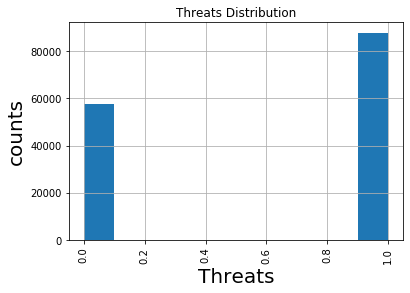

In [9]:
from matplotlib import pyplot as plt 
data['label'].hist()
plt.xlabel('Threats', fontsize=20)
plt.ylabel('counts', fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.title('Threats Distribution')
plt.show()

In [10]:
data.shape

(145585, 42)

In [11]:
# Dividing dataset into features and target variable
X = data.iloc[:,:41]
y = data.iloc[:,41:]

In [12]:
y.shape

(145585, 1)

In [13]:
# Feature selection
# Chi square test - to find relationship between categorical variables(gender) - weightage for each column(0-1)
# T test, Z test  - to find relationship between Numerical variables (salary) - weightage for each column(0-1)
# P value - should be less than 0.05 to achive good resluts (Numerical variables) - weightage for each column(0-1)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features = SelectKBest(score_func=chi2,k=10)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfscores.columns=['score']
dfscores['feature']= X.columns

In [14]:
dfscores.head()

,score,feature
0,5.430956e+06,duration
1,4.992933e+02,protocol_type
2,2.872929e+05,service
3,7.896510e+04,flag
4,1.252481e+09,src_bytes


In [15]:
dfscores.nlargest(10,'score')

,score,feature
4,1.252481e+09,src_bytes
5,5.737320e+07,dst_bytes
22,1.278330e+07,count
32,9.233081e+06,dst_host_srv_count
0,5.430956e+06,duration
31,2.134316e+06,dst_host_count
2,2.872929e+05,service
3,7.896510e+04,flag
38,6.390096e+04,dst_host_srv_serror_rate
24,6.373688e+04,serror_rate


In [16]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
imp = pd.DataFrame(model.feature_importances_)
imp.columns = ['score']
imp['feature']= X.columns

C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
imp.nlargest(10,'score')


,score,feature
25,0.196980,srv_serror_rate
38,0.187232,dst_host_srv_serror_rate
28,0.108941,same_srv_rate
22,0.098162,count
24,0.082670,serror_rate
3,0.079935,flag
27,0.037888,srv_rerror_rate
32,0.035116,dst_host_srv_count
26,0.017313,rerror_rate
1,0.016911,protocol_type


In [18]:
selectedFeatures=data.loc[:,['count','serror_rate','srv_serror_rate','dst_host_srv_count']]

In [19]:
selectedFeatures.describe()

,count,serror_rate,srv_serror_rate,dst_host_srv_count
count,145585.000000,145585.000000,145585.000000,145585.000000
mean,74.386097,0.291381,0.291553,129.935570
std,100.336106,0.452904,0.453567,114.714717
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,12.000000
50%,12.000000,0.000000,0.000000,117.000000
75%,132.000000,1.000000,1.000000,255.000000
max,511.000000,1.000000,1.000000,255.000000


In [20]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(selectedFeatures)

In [21]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [22]:
print(y_train.shape)

(116468, 1)


In [ ]:
############## STEP 2 : Model #######################

In [23]:
# Rondom forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
pred= model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     11593
           1       0.96      0.99      0.98     17524

    accuracy                           0.97     29117
   macro avg       0.97      0.96      0.97     29117
weighted avg       0.97      0.97      0.97     29117



In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
cm

array([[10854,   739],
       [  116, 17408]], dtype=int64)

In [27]:
# Grid search to get best model hyperparameter values
paramter={'max_depth':[3,10,None]}
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(model,paramter,n_jobs=-1, cv=3, scoring='roc_auc')
gridSearch.fit(X_train, y_train)
print(gridSearch.best_params_)

C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 10}


In [28]:
# Run model with best hyperparameter value obtained
new_model = RandomForestClassifier(n_estimators=100,max_depth=10,n_jobs=-1)
new_model.fit(X_train,y_train)
new_pred= model.predict(X_test)
print(classification_report(y_test,new_pred))

C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

           0       0.99      0.94      0.96     11593
           1       0.96      0.99      0.98     17524

    accuracy                           0.97     29117
   macro avg       0.97      0.96      0.97     29117
weighted avg       0.97      0.97      0.97     29117



In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,new_pred)
cm

array([[10854,   739],
       [  116, 17408]], dtype=int64)

In [ ]:
############## STEP 3 : Resampling #######################

In [48]:
df1 = pd.DataFrame(y_train)
df1['label'].value_counts()

1    70307
0    46161
Name: label, dtype: int64

In [30]:
#for balancing the dataset, used SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE()
X_train_res, y_train_res = sm.fit_sample(X_train,y_train)

Using TensorFlow backend.
C:\Users\M1040943\AppData\Local\conda\conda\envs\tensorflow_cpu\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
df = pd.DataFrame(y_train_res)
df[0].value_counts()


1    70307
0    70307
Name: 0, dtype: int64

In [49]:
new_model.fit(X_train_res,y_train_res)
pred_res= model.predict(X_test)
print(classification_report(y_test,pred_res))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     11593
           1       0.96      0.99      0.98     17524

    accuracy                           0.97     29117
   macro avg       0.97      0.96      0.97     29117
weighted avg       0.97      0.97      0.97     29117

